# Visualization

Visualizing the results from the [notebook.ipynb](./notebook.ipynb) where Machine Learning models were trained and evaluated.

In [1]:
from utils.utils import Pickler

## Data

In [2]:
filename = './data/notebook_data.pkl'
data = Pickler(filename).load()

In [3]:
print(data)

({'linear_regression': {'y_hat': array([3500413.03747167,  479989.24648408,    4899.49421801, ...,
          4846.01805049,    4834.31030377,   22711.66223372]), 'MAE': 596.9370449734704, 'MSE': 6163872.52624833, 'RMSE': 2482.7147492711138, 'RMSE%': 0.8136823126897511, 'R^2': 0.9999879425647927}, 'ridge_regression': {'y_hat': array([3500429.93147634,  479988.10640106,    4900.31011   , ...,
          4846.47288686,    4835.01686507,   22711.9293441 ]), 'MAE': 597.4019573181515, 'MSE': 6163891.939694439, 'RMSE': 2482.718658989463, 'RMSE%': 0.8136835940567183, 'R^2': 0.9999879425268172}, 'lasso_regression': {'y_hat': array([3499899.3818974 ,  479991.98653736,    4898.73181803, ...,
          4847.66911866,    4837.77202545,   22711.01307534]), 'MAE': 600.0803923487567, 'MSE': 6233238.167508318, 'RMSE': 2496.645382810366, 'RMSE%': 0.8182479238292427, 'R^2': 0.9999878068754641}, 'decision_tree_regressor': {'y_hat': array([3500000.,  480000.,   20000., ...,   20000.,   20000.,   20000.]), '

# Scores

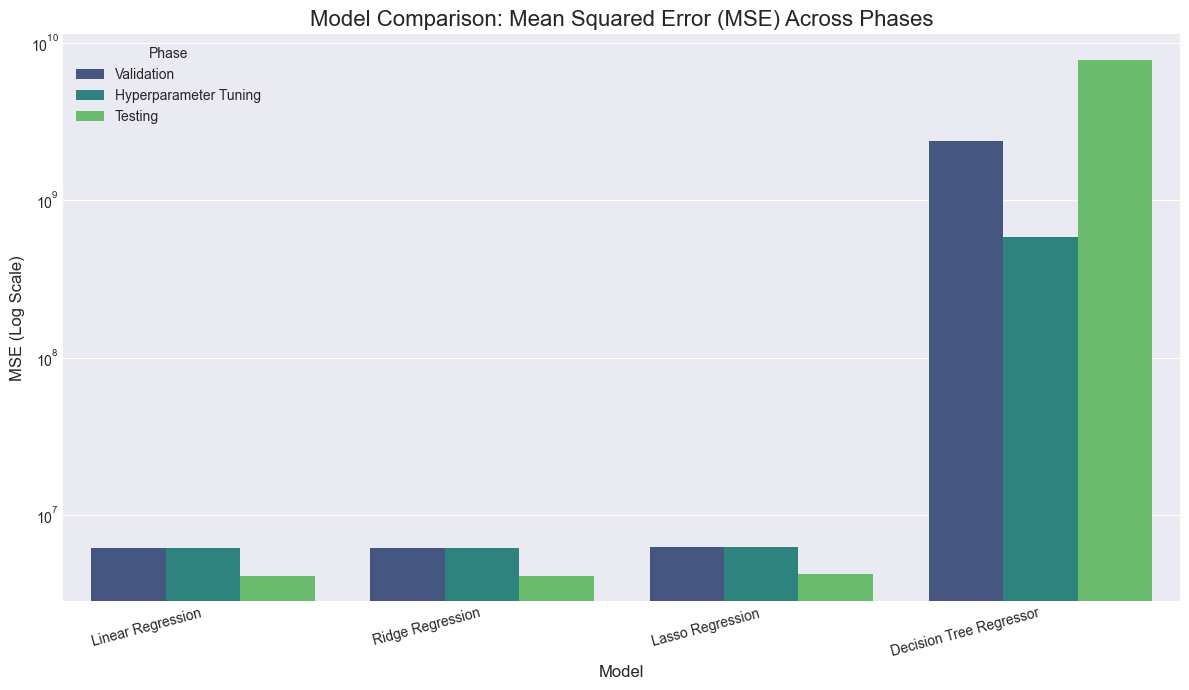

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define phase names (adjust if needed)
phases = ['Validation', 'Hyperparameter Tuning', 'Testing']

# Extract MSE data
mse_data = []
for i, phase_name in enumerate(phases):
    phase_results = data[i]
    for model_name, metrics in phase_results.items():
        mse_data.append({
            'Phase': phase_name,
            'Model': model_name.replace('_', ' ').title(), # Make names nicer
            'MSE': metrics['MSE']
        })

# Create DataFrame
df_mse = pd.DataFrame(mse_data)

# Create the plot
plt.style.use('seaborn-v0_8-darkgrid') # Use a nice style
plt.figure(figsize=(12, 7))

ax = sns.barplot(x='Model', y='MSE', hue='Phase', data=df_mse, palette='viridis')

# Set y-axis to log scale
ax.set_yscale('log')

# Add titles and labels
plt.title('Model Comparison: Mean Squared Error (MSE) Across Phases', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE (Log Scale)', fontsize=12)
plt.xticks(rotation=15, ha='right') # Rotate x-labels slightly for better readability
plt.legend(title='Phase')
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()